<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_3_2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.2_n250.csv',
 'data_multi_delta_-3.2_n120.csv',
 'data_multi_delta_-3.2_n60.csv',
 'data_multi_delta_-3.2_n30.csv',
 'data_multi_delta_-3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,62.636396,59.621251,71.311720,-0.000430,203.568937,203.569506,-0.000570
1,0.0,1.0,81.462764,57.347198,47.160506,0.001285,195.971752,195.971280,0.000472
2,0.0,2.0,69.413709,50.316991,38.608854,-0.001151,168.338403,168.340608,-0.002205
3,0.0,3.0,97.416442,36.548108,67.170318,0.004793,211.139660,211.135543,0.004118
4,0.0,4.0,48.907890,21.775968,80.421043,0.009854,161.114755,161.105256,0.009499
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,20.857714,46.988897,65.585601,-0.001846,143.430366,143.431926,-0.001560
119996,999.0,116.0,56.493301,89.309098,93.287684,0.001386,249.091468,249.090411,0.001057
119997,999.0,117.0,41.473854,78.144097,34.187442,0.000243,163.805637,163.805390,0.000246
119998,999.0,118.0,74.853999,48.275706,70.085657,-0.001620,203.213743,203.215486,-0.001744


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,62.636396,59.621251,71.311720,-0.000430,203.568937,203.569506,-0.000570
1,0.0,1.0,81.462764,57.347198,47.160506,0.001285,195.971752,195.971280,0.000472
2,0.0,2.0,69.413709,50.316991,38.608854,-0.001151,168.338403,168.340608,-0.002205
3,0.0,3.0,97.416442,36.548108,67.170318,0.004793,211.139660,211.135543,0.004118
4,0.0,4.0,48.907890,21.775968,80.421043,0.009854,161.114755,161.105256,0.009499
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,20.857714,46.988897,65.585601,-0.001846,143.430366,143.431926,-0.001560
119996,999.0,116.0,56.493301,89.309098,93.287684,0.001386,249.091468,249.090411,0.001057
119997,999.0,117.0,41.473854,78.144097,34.187442,0.000243,163.805637,163.805390,0.000246
119998,999.0,118.0,74.853999,48.275706,70.085657,-0.001620,203.213743,203.215486,-0.001744


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    62.636396  59.621251  71.311720  ...  203.568937  203.569506 -0.000570
      1.0    81.462764  57.347198  47.160506  ...  195.971752  195.971280  0.000472
      2.0    69.413709  50.316991  38.608854  ...  168.338403  168.340608 -0.002205
      3.0    97.416442  36.548108  67.170318  ...  211.139660  211.135543  0.004118
      4.0    48.907890  21.775968  80.421043  ...  161.114755  161.105256  0.009499
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  20.857714  46.988897  65.585601  ...  143.430366  143.431926 -0.001560
      116.0  56.493301  89.309098  93.287684  ...  249.091468  249.090411  0.001057
      117.0  41.473854  78.144097  34.187442  ...  163.805637  163.805390  0.000246
      118.0  74.853999  48.275706  70.085657  ...  203.213743  203.215486 -0.001744
      119.0  51.299693  74.003794  82.152189  ...  217.456452  217.455836  0.000616

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    62.636396  59.621251  71.311720  ...  203.568937  203.569506 -0.000570
      1.0    81.462764  57.347198  47.160506  ...  195.971752  195.971280  0.000472
      2.0    69.413709  50.316991  38.608854  ...  168.338403  168.340608 -0.002205
      3.0    97.416442  36.548108  67.170318  ...  211.139660  211.135543  0.004118
      4.0    48.907890  21.775968  80.421043  ...  161.114755  161.105256  0.009499
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  20.857714  46.988897  65.585601  ...  143.430366  143.431926 -0.001560
      116.0  56.493301  89.309098  93.287684  ...  249.091468  249.090411  0.001057
      117.0  41.473854  78.144097  34.187442  ...  163.805637  163.805390  0.000246
      118.0  74.853999  48.275706  70.085657  ...  203.213743  203.215486 -0.001744
      119.0  51.299693  74.003794  82.152189  ...  217.456452  217.455836  0.000616

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,62.636396,59.621251,71.311720,-0.000430,203.568937,203.569506,-0.000570
1,0.0,1.0,81.462764,57.347198,47.160506,0.001285,195.971752,195.971280,0.000472
2,0.0,2.0,69.413709,50.316991,38.608854,-0.001151,168.338403,168.340608,-0.002205
3,0.0,3.0,97.416442,36.548108,67.170318,0.004793,211.139660,211.135543,0.004118
4,0.0,4.0,48.907890,21.775968,80.421043,0.009854,161.114755,161.105256,0.009499
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,20.857714,46.988897,65.585601,-0.001846,143.430366,143.431926,-0.001560
119996,999.0,116.0,56.493301,89.309098,93.287684,0.001386,249.091468,249.090411,0.001057
119997,999.0,117.0,41.473854,78.144097,34.187442,0.000243,163.805637,163.805390,0.000246
119998,999.0,118.0,74.853999,48.275706,70.085657,-0.001620,203.213743,203.215486,-0.001744


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    62.636396  59.621251  71.311720  ...  203.568937  203.569506 -0.000570
      1.0    81.462764  57.347198  47.160506  ...  195.971752  195.971280  0.000472
      2.0    69.413709  50.316991  38.608854  ...  168.338403  168.340608 -0.002205
      3.0    97.416442  36.548108  67.170318  ...  211.139660  211.135543  0.004118
      4.0    48.907890  21.775968  80.421043  ...  161.114755  161.105256  0.009499
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  20.857714  46.988897  65.585601  ...  143.430366  143.431926 -0.001560
      116.0  56.493301  89.309098  93.287684  ...  249.091468  249.090411  0.001057
      117.0  41.473854  78.144097  34.187442  ...  163.805637  163.805390  0.000246
      118.0  74.853999  48.275706  70.085657  ...  203.213743  203.215486 -0.001744
      119.0  51.299693  74.003794  82.152189  ...  217.456452  217.455836  0.000616

[120000 rows x 7 columns]

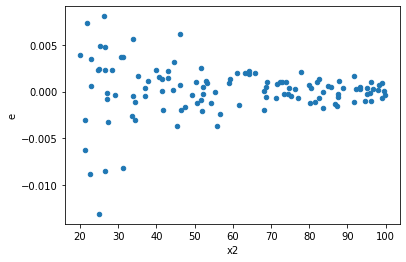

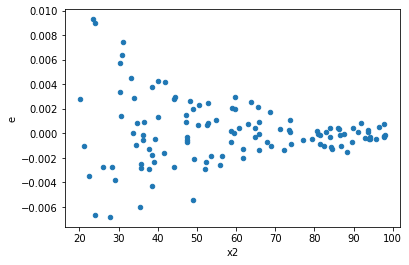

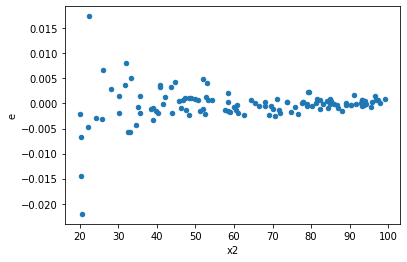

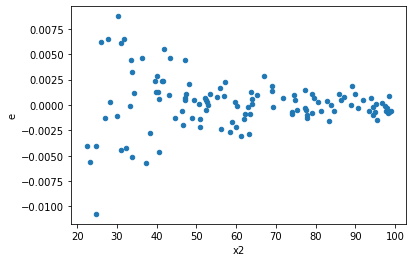

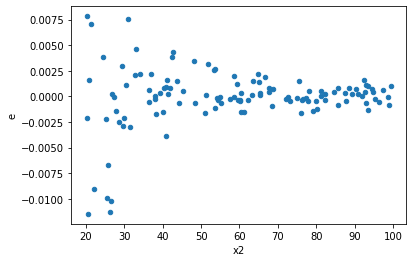

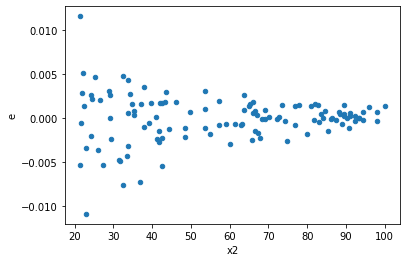

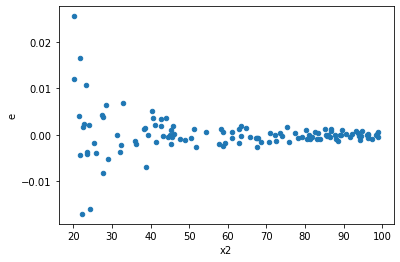

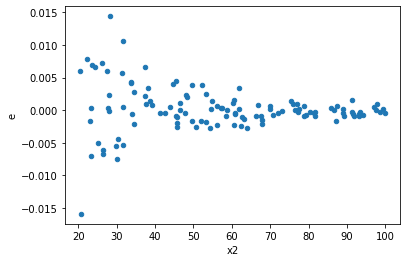

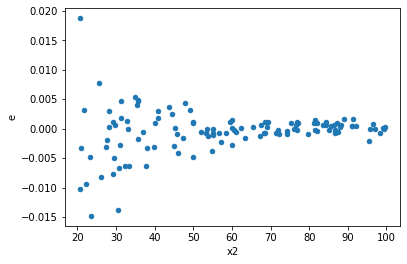

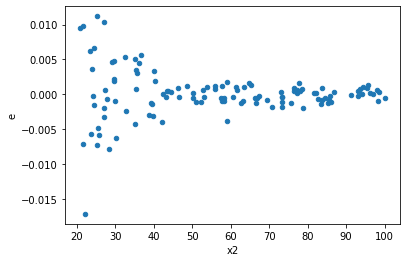

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,0.0006492138374097428,2.7560346753886432e-05,1.4426974164660952e-05,6.124521500863652e-07,0.042451878203717465,9.324609994417284e-20,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,0.0013872692081808103,3.920200964357596e-05,3.0828204626240225e-05,8.711557698572435e-07,0.028258401046025776,1.7739514013871457e-23,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,0.0005982269858582515,3.112088530401646e-05,1.3293933019072255e-05,6.915752289781435e-07,0.05202186801949198,6.1017104808042816e-18,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,0.0008971817102216929,4.218861194405024e-05,1.9937371338259843e-05,9.375247098677831e-07,0.04702348639455152,7.714284490173352e-19,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,0.0008012357179602226,3.801751493129197e-05,1.7805238176893836e-05,8.448336651398215e-07,0.0474486023015506,9.282333239872415e-19,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,0.0010055007553496837,4.0098021688443286e-05,2.234446122999297e-05,8.91067148632073e-07,0.039878658941930246,2.539713610999933e-20,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,0.0008294127486971665,4.751458071432527e-05,1.843139441549259e-05,1.0558795714294504e-06,0.05728701516700908,4.308401732334108e-17,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,0.0005978946356335153,3.8922019444028484e-05,1.3286547458522562e-05,8.649337654228552e-07,0.06509845903331715,5.571656362534644e-16,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,0.000762990842349986,3.792267991741301e-05,1.695535205222191e-05,8.427262203869557e-07,0.0497026672045138,2.404503334646665e-18,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64